### Task Scheduler (Medium) [TIP103-3-1]
- LeetCode: https://leetcode.com/problems/task-scheduler/description/
- Video Solution: https://www.youtube.com/watch?v=CHlCkJadQ7o

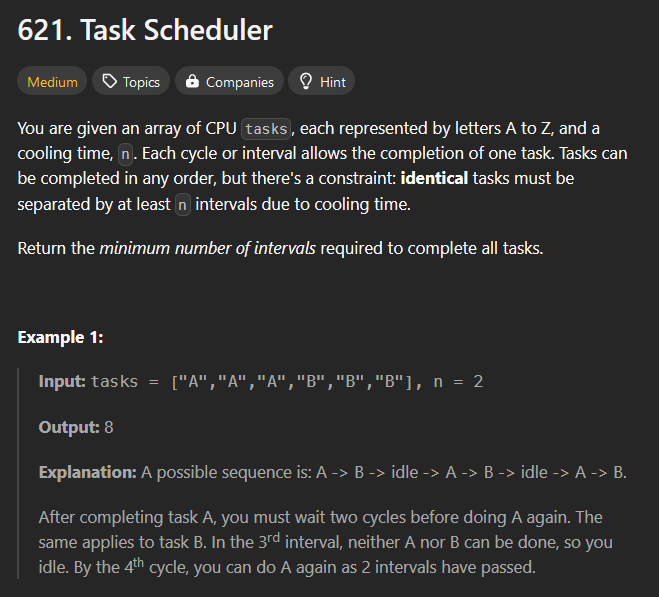
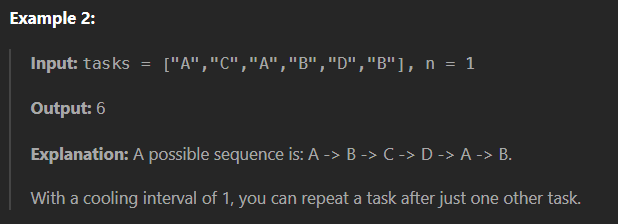
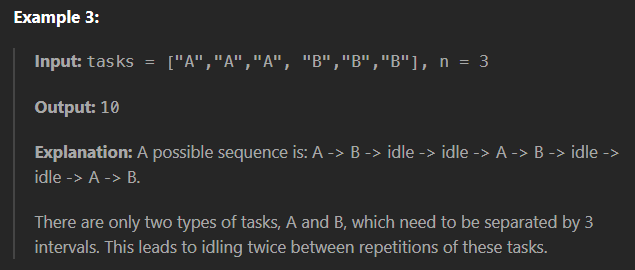

#### Understand:
    - Interval: For a given task, to do that task again, the CPU must either do a different task or be idle
    - For example, starting with A, the CPU does B and then an idle before it does A again
    - Return not the schedule but the total amount of time, len(schedule_array) so that all tasks are processed

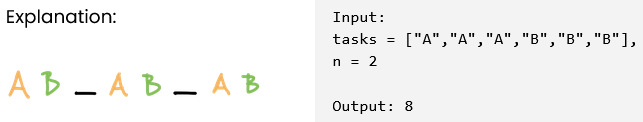
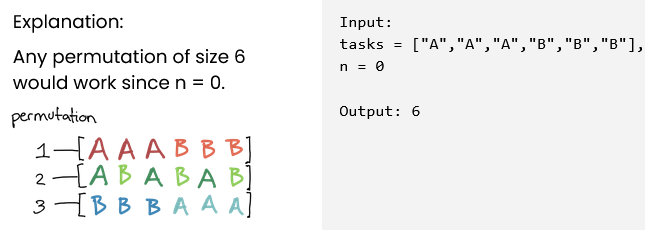
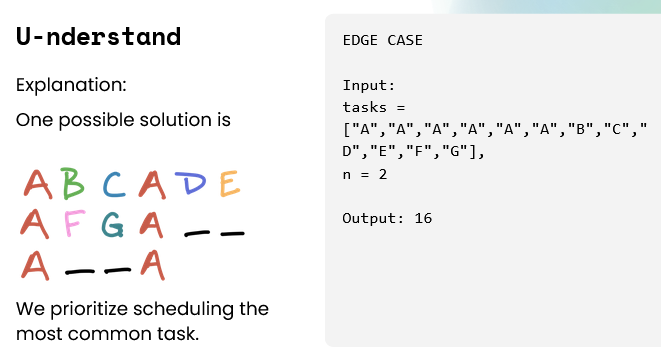

**Prioritize scheduling the most common task**

#### Match
    1. The total number of CPU cycles is the sum of:
        a. Busy Slots (Tasks)
        b. Idle Slots (Cooldown time)

    2. The number of busy slots is len(tasks)
        a. Therefore need to determine the number of idle slots to get the total CPU time

    3. For the number of idle tasks
        a. Worst case = (max_freq - 1) * cooling time
            i. Example: [A,A,A], n=2
            A _ _ A _ _ A, idle time = 4, tasks = 3, total = 7

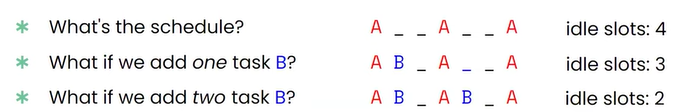
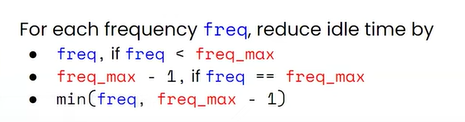

    For any tasks other than the max frequency task:
        if task_freq < max_freq:
            idle_time = idle_time - task_freq

        if task_freq == max_freq:
            max_freq - 1

In [1]:
def leastInterval(tasks, n):
    
    
    # Step 1: Count the frequency of each task
    freq_dict = {}
    
    for t in tasks:
        if t in freq_dict.keys():
            freq_dict[t] += 1
        else:
            freq_dict[t] = 1
            
    busy_slots = list(freq_dict.values())
    
    print(f'Original Frequencies: {freq_dict}')
    print(f'Busy Slots: {busy_slots}')
    
    # Step 3: Find the maximum frequency of any task
    f_max = max(busy_slots)
    # Remove one occurrence of the maximum frequency to handle the main task
    busy_slots.remove(f_max)
    
    print(f'After Max Freq Removal: {busy_slots}')
    print(f'Max Frequency: {f_max}')
    print(f'Cooling Cycles: {n}')
    
    # Step 4: Calculate the initial idle time
    idle_time = (f_max - 1) * n
    print(f'Idle Time({f_max}-1*{n}): {idle_time}')
    
    # Step 5: Fill the idle slots with remaining tasks
    while busy_slots and idle_time > 0:
        last_task = busy_slots.pop()
        print(f'Last Task: {last_task}')
        
        # Print the minimum between the remaining slots for f_max-1 and the last task frequency
        print(f'Min between Last Task and f_max-1: {min(f_max - 1, last_task)}')
        
        # Reduce idle time by the number of slots filled by the current task
        idle_time = idle_time - min(f_max - 1, last_task)
        # Print the new idle time after filling slots
        print(f'New Idle Time: {idle_time}')
    
    # Ensure idle time is not negative
    final_idle_time = max(0, idle_time)
    print(f'Final Idle Time: {final_idle_time}')
    
    # Total CPU cycles is the sum of idle time and the number of tasks
    cpu_cycles = final_idle_time + len(tasks)
    print(f'Totla CPU Cycles [Final Idle Time ({final_idle_time}) + Length of Tasks ({len(tasks)})]: {cpu_cycles}')
    
    # Return the total number of CPU cycles required
    return cpu_cycles

In [2]:
task_list1 = ["A","A","A","B","B","B","C","C","C"]
task_list2 = ["A","A","A","A","A","A","B","C","D","E","F","G"]
# leastInterval_mod(task_list1, 2)

leastInterval(task_list2, 2)


Original Frequencies: {'A': 6, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1, 'G': 1}
Busy Slots: [6, 1, 1, 1, 1, 1, 1]
After Max Freq Removal: [1, 1, 1, 1, 1, 1]
Max Frequency: 6
Cooling Cycles: 2
Idle Time(6-1*2): 10
Last Task: 1
Min between Last Task and f_max-1: 1
New Idle Time: 9
Last Task: 1
Min between Last Task and f_max-1: 1
New Idle Time: 8
Last Task: 1
Min between Last Task and f_max-1: 1
New Idle Time: 7
Last Task: 1
Min between Last Task and f_max-1: 1
New Idle Time: 6
Last Task: 1
Min between Last Task and f_max-1: 1
New Idle Time: 5
Last Task: 1
Min between Last Task and f_max-1: 1
New Idle Time: 4
Final Idle Time: 4
Totla CPU Cycles [Final Idle Time (4) + Length of Tasks (12)]: 16


16

### Complexity Analysis:
Since F (the number of unique tasks) is at most 26 (the number of uppercase English letters), F can be considered a constant. Therefore, the dominant term is O(T), making the overall time complexity of the function:

O(T)
Space Complexity Analysis

    Frequency Dictionary:
        The frequency dictionary freq_dict has a space complexity of O(F).

    Busy Slots List:
        The list busy_slots also has a space complexity of O(F).

Considering F is a constant (at most 26), the space complexity is O(1).
Conclusion

    Time Complexity: O(T), where T is the number of tasks.
    Space Complexity: O(1).